In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

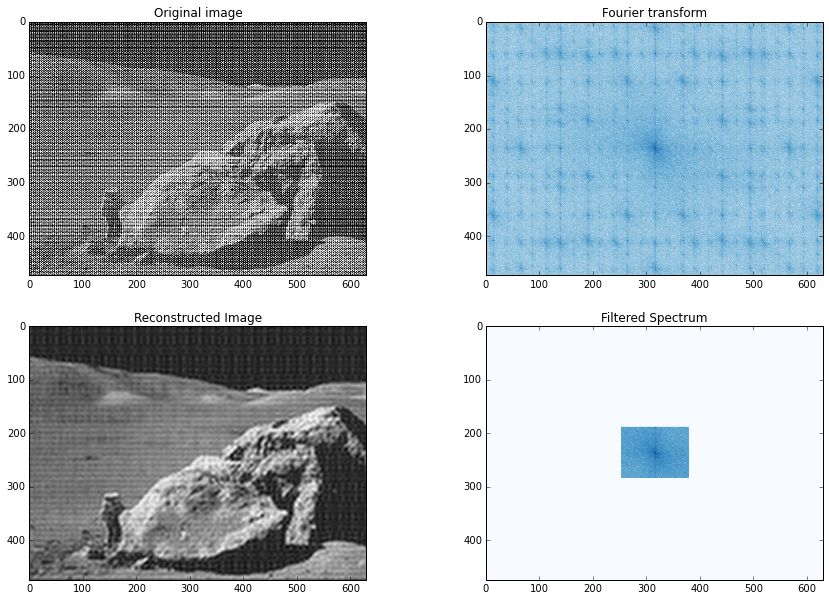

In [4]:
"""
An image contaminated by periodic systems noise is filtered by supressing
appropriate frequencies in its spectrum.

Note that most computational packages return the 2-dimensional FFT with the
lowest frequencies on the outside (four corners), and the highest frequencies
in the center.  The ``np.fft.fftshift`` command is used to move the low
frequency components to the center.
"""


def plot_spectrum(F, axis):
    """Compress and plot an amplitude spectrum.

    The values in the spectrum vary widely in amplitude, so a log transform is
    applied to compress its range.

    """
    # Compute the spectrum magnitude
    mag = np.abs(F)

    # Compress range
    mag = np.log(1 + mag)

    # Display
    axis.imshow(np.fft.fftshift(mag), plt.cm.Blues)


image = plt.imread('../images/moonlanding.jpg')

# Compute the 2-D FFT of the input image
F = np.fft.fft2(image)

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Make a copy of the original spectrum to operate on
FF = F.copy()

r, c = FF.shape

# Set to zero all rows with indices between r * keep_fraction and
# r * (1 - keep_fraction)
#
# Recall that numpy (and most other packages) return the FFT with the lowest
# frequency components on the outside, the highest frequencies in the
# center.
#
# This operation therefore discards high frequencies.
FF[r * keep_fraction:r * (1 - keep_fraction)] = 0

# Similarly with the columns
FF[:, c * keep_fraction:c * (1-keep_fraction)] = 0

# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
image_filtered = np.fft.ifft2(FF).real

# Show the results
f, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original image')

plot_spectrum(F, ax[0, 1])
ax[0, 1].set_title('Fourier transform')

ax[1, 0].imshow(image_filtered, plt.cm.gray)
ax[1, 0].set_title('Reconstructed Image')

plot_spectrum(FF, ax[1, 1])
ax[1, 1].set_title('Filtered Spectrum')

plt.show()